In [22]:
from tifffile import imread,imwrite
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pywt

torch.cuda.empty_cache()
video = torch.from_numpy(np.load('filterred.npy')).to('cuda')
shape=video.shape
print(shape)

torch.Size([1349, 270, 360])


In [23]:
# Combine width and height dimension
video = video.reshape(shape[0],shape[1]*shape[2])

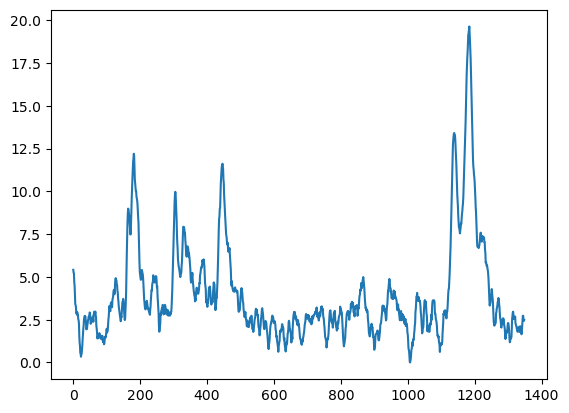

In [24]:
plt.plot(video[:,11900].cpu().numpy())

In [25]:
x = torch.randn(3, 4, 5)  # Example tensor
grad = torch.gradient(x, dim=1)  # Differentiate along axis 1

In [26]:
# SVD
_, s, v = torch.svd(video)
print(v.shape)

torch.Size([97200, 1349])


(tensor(0.1913, device='cuda:0'), 98200.1875)
(tensor(0.0399, device='cuda:0'), 20463.48828125)
(tensor(0.0324, device='cuda:0'), 16636.201171875)
(tensor(0.0287, device='cuda:0'), 14751.4853515625)
(tensor(0.0238, device='cuda:0'), 12219.7294921875)
(tensor(0.0215, device='cuda:0'), 11010.3720703125)


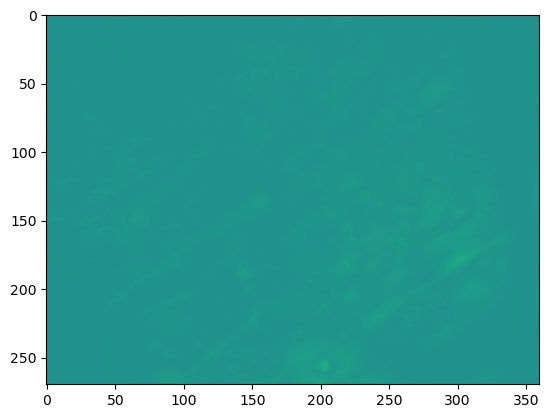

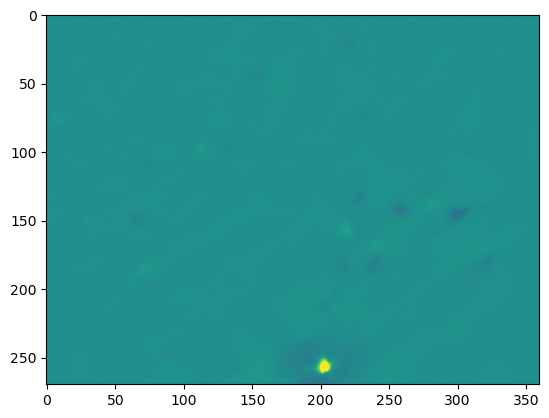

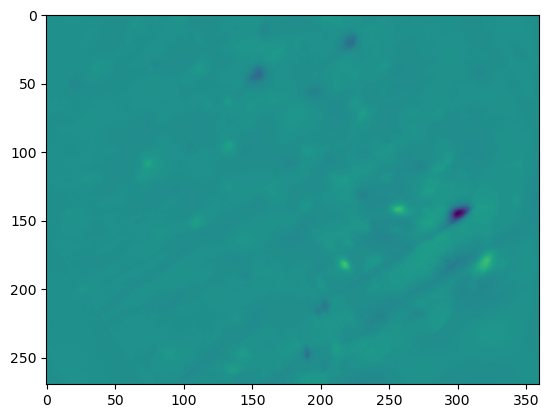

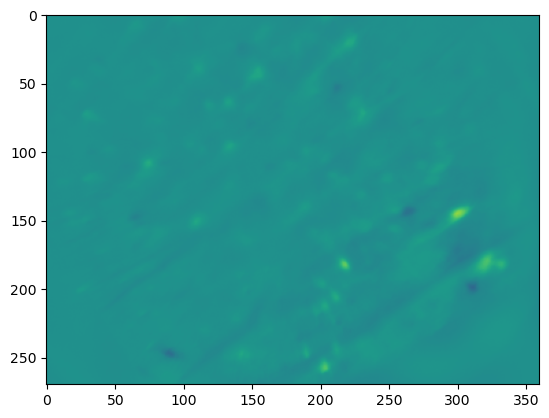

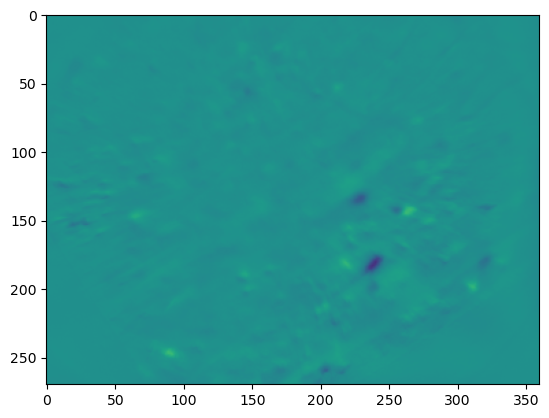

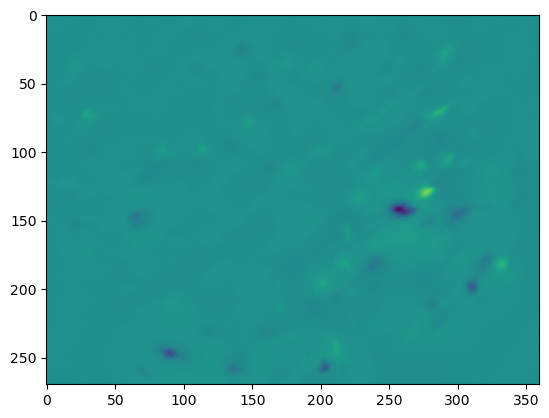

In [ ]:
lambda_sum=torch.sum(s)
max_vals = v.max()/4
min_vals = v.min()
eigen_images=v.view(shape[1],shape[2],shape[0])
cumulative_lambda = 0
i = 0
#while cumulative_lambda/lambda_sum<0.3:
for j in range(6):
    cumulative_lambda += s[i]
    print((s[i]/lambda_sum,s[i].item()))
    map = eigen_images[:,:,i]
    plt.figure()
    plt.imshow(map.to('cpu').numpy(),vmin=min_vals,vmax=max_vals)
    i += 1

In [28]:
from torch.distributions import Categorical
s /= s.norm()
E = Categorical(s).entropy()/np.log(len(s))
s = s.to('cpu').numpy()

Entropy is: 0.6958540081977844


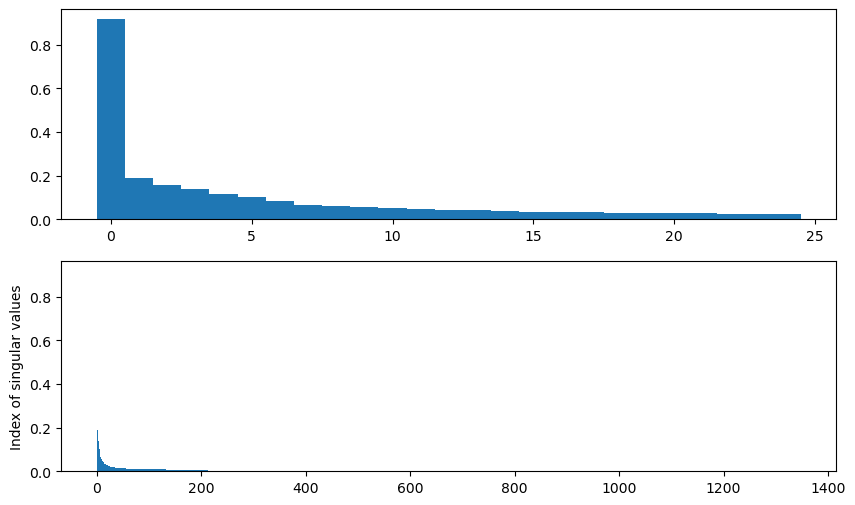

In [29]:
n = len(s)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.bar(range(25),s[:25],width=1.0)
plt.subplot(2,1,2)
plt.bar(range(n),s,width=1.0)
plt.ylabel("Contrbution to variance of data (%)")
plt.ylabel("Index of singular values")
print(f"Entropy is: {E}")

In [30]:
min_vals, _ = torch.min(video,dim=1, keepdim=True)
video -= min_vals
video = video.view(shape[0],shape[1],shape[2])
imwrite('mean_subtracted.tif',video.to('cpu').numpy().astype(np.uint16))

In [31]:
%reset

Nothing done.
